In [1]:
import pandas as pd,yfinance as yf

In [2]:
#df=pd.read_csv('AAPL.csv')

df = yf.download(tickers='AAPL',start='2015-5-27',end='2020-5-22')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-05-27,29.643917,33.009998,33.064999,32.512501,32.584999,183332800
2015-05-28,29.585554,32.945000,32.987499,32.775002,32.965000,122933200
2015-05-29,29.248783,32.570000,32.862499,32.474998,32.807499,203538000
2015-06-01,29.307158,32.634998,32.847500,32.512501,32.570000,128451200
2015-06-02,29.176947,32.490002,32.665001,32.330002,32.465000,134670400


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-05-15,74.959221,76.927498,76.974998,75.052498,75.087502,166348400
2020-05-18,76.725342,78.739998,79.125000,77.580002,78.292503,135178400
2020-05-19,76.282021,78.285004,79.629997,78.252502,78.757500,101729600
2020-05-20,77.765541,79.807503,79.879997,79.129997,79.169998,111504800
2020-05-21,77.185753,79.212502,80.222504,78.967499,79.665001,102688800


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

Ticker,AAPL
0,33.009998
1,32.945000
2,32.570000
3,32.634998
4,32.490002
...,...
1252,76.927498
1253,78.739998
1254,78.285004
1255,79.807503


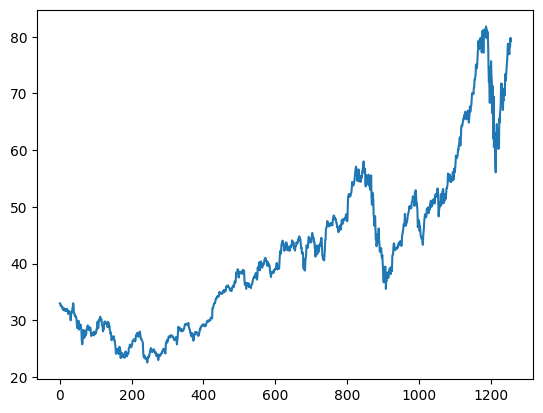

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
df1

Ticker,AAPL
0,33.009998
1,32.945000
2,32.570000
3,32.634998
4,32.490002
...,...
1252,76.927498
1253,78.739998
1254,78.285004
1255,79.807503


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.17605334]
 [0.17495567]
 [0.16862281]
 ...
 [0.94064005]
 [0.96635143]
 [0.95630328]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(817, 440)

In [14]:
train_data

array([[0.17605334],
       [0.17495567],
       [0.16862281],
       [0.16972049],
       [0.16727184],
       [0.16794729],
       [0.16473867],
       [0.16174109],
       [0.15815251],
       [0.15654817],
       [0.16271218],
       [0.16148779],
       [0.15549269],
       [0.15443722],
       [0.15730811],
       [0.15604156],
       [0.15849024],
       [0.15308621],
       [0.15735034],
       [0.15490163],
       [0.15946129],
       [0.15688593],
       [0.1537195 ],
       [0.14434687],
       [0.14814659],
       [0.15308621],
       [0.15241072],
       [0.15055307],
       [0.1492443 ],
       [0.13607195],
       [0.12551719],
       [0.13906949],
       [0.14911764],
       [0.14890654],
       [0.15401503],
       [0.16115003],
       [0.16583634],
       [0.17618006],
       [0.17060711],
       [0.14726   ],
       [0.14700669],
       [0.14422022],
       [0.13691631],
       [0.13949168],
       [0.13784514],
       [0.13522758],
       [0.13071014],
       [0.118

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0268 - val_loss: 0.0535
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 7.9019e-04 - val_loss: 0.0041
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 6.0843e-04 - val_loss: 0.0047
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 6.8895e-04 - val_loss: 0.0038
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 5.9261e-04 - val_loss: 0.0037
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 6.3765e-04 - val_loss: 0.0041
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 6.1025e-04 - val_loss: 0.0037
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.9986e-04 - val_loss: 0.0035
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 5.5188e-04 - val_loss: 0.0047
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 6.3431e-04 - val_loss: 0.0042
Epoch 

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.17.0'

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35.50505365225072

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

59.3304812800849

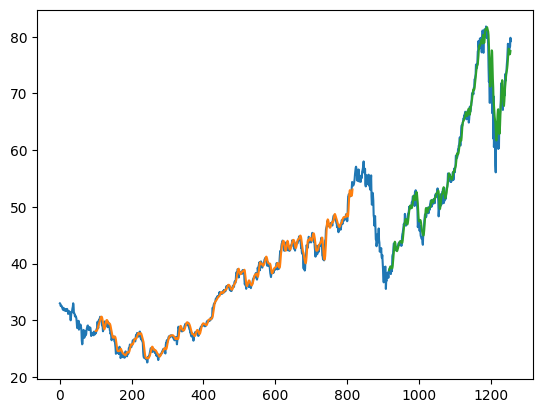

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [37]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.8493624047839645,
 0.8583550786846084,
 0.8866418799940063,
 0.8743138666861476,
 0.8843197560655391,
 0.8783669862856442,
 0.8986320689141138,
 0.9258211342267,
 0.9287763889871312,
 0.9567676261678102,
 0.9386978866907114,
 0.9330405521972824,
 0.9495059479381955,
 0.9642404768503328,
 0.9551211510148454,
 0.9598919219643705,
 0.9663514283258923,
 0.9624672209202714,
 0.9229502711420798,
 0.9598496617053383,
 0.9879252905618283,
 0.9859409910211123,
 0.9253145264873261,
 0.9217258832104245,
 0.9647470845897066,
 0.9757240580310664,
 0.9915983255145413,
 0.969728899149886,
 0.9761461452523756,
 0.9679556432198246,
 1.0000000000000002,
 0.9901628939722313,
 0.9905007183599825,
 0.9653803442639237,
 0.9848855152833327,
 0.970868766563477,
 0.9402599701678649,
 0.877480293899487,
 0.8348390483247352,
 0.8541331757334893,
 0.7733681516638238,
 0.7726926317305745,
 0.8801401133734523,
 0.8400742955968548,
 0.8967321610492089,
 0.8552731719893336,
 0.8388499076651994,
 0.7423372680469023

In [40]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95420146]
101
1 day input [0.85835508 0.88664188 0.87431387 0.88431976 0.87836699 0.89863207
 0.92582113 0.92877639 0.95676763 0.93869789 0.93304055 0.94950595
 0.96424048 0.95512115 0.95989192 0.96635143 0.96246722 0.92295027
 0.95984966 0.98792529 0.98594099 0.92531453 0.92172588 0.96474708
 0.97572406 0.99159833 0.9697289  0.97614615 0.96795564 1.
 0.99016289 0.99050072 0.96538034 0.98488552 0.97086877 0.94025997
 0.87748029 0.83483905 0.85413318 0.77336815 0.77269263 0.88014011
 0.8400743  0.89673216 0.85527317 0.83884991 0.74233727 0.82327108
 0.781432   0.66659625 0.79215567 0.64118044 0.68614369 0.6600101
 0.6520307  0.58642236 0.56586165 0.66089672 0.65515493 0.70970191
 0.66452756 0.69437638 0.69218098 0.63569196 0.65266396 0.63780291
 0.72671618 0.71388155 0.74191505 0.75002103 0.77222828 0.83049049
 0.81942913 0.82897067 0.81254741 0.78776486 0.75162538 0.78426073
 0.77974327 0.81326519 0.81410962 0.79473097 0.83336149 0.85898834
 0.83901882 0.85628639 0.87486273 0.887824

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df1)

1257

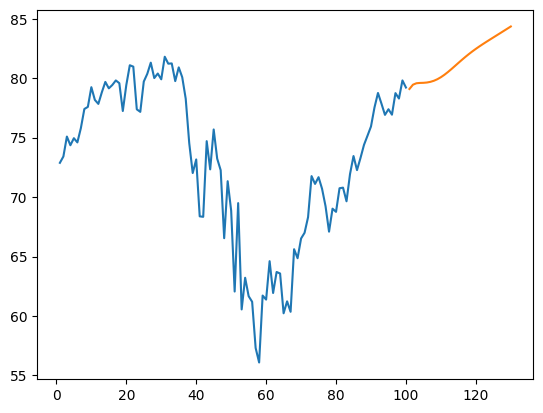

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

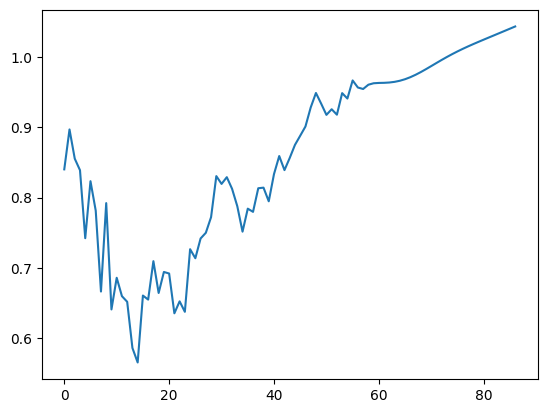

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

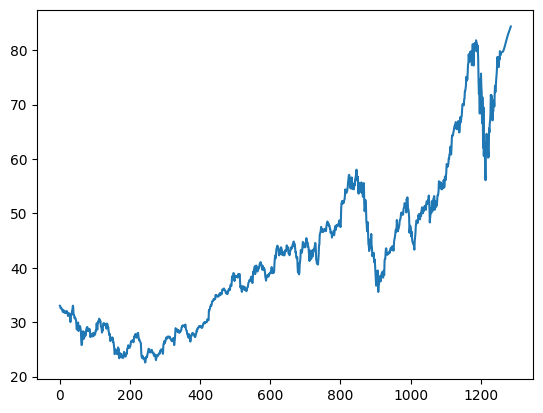

In [48]:
plt.plot(df3)